# **Etapa 1 - Pré-processamento**

Realize todas a fases de pré-processamento, incluindo:
* Remoção de atributos faltantes.
* Normalização ou padronização.
* Transformação de valores, se for o caso.

In [1]:
#importações utilizadas neste Projeto
import warnings
warnings.filterwarnings('ignore') #ignorar erros
import pandas as pd # biblioteca para o processamento de dados, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #biblioteca para gráficos e visualização de dados
import seaborn as sns #biblitoca para visualização de dados baseada no matplotlib
from sklearn.model_selection import train_test_split #treinamento dos modelos
from sklearn.metrics import classification_report, confusion_matrix #métricas de classificação

#Importa os métodos de classificação

#import tree
from sklearn.tree import DecisionTreeClassifier
# importing RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
#import KNN
from sklearn.neighbors import KNeighborsClassifier
#import Naive Bayes
from sklearn.naive_bayes import GaussianNB
#import SVM
from sklearn.svm import SVC
#import rede neural MLP
from sklearn.neural_network import MLPClassifier


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df_cancer = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kag_risk_factors_cervical_cancer.csv') #carregar o arquivo csv para o data frame wine
df_cancer.head(10)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,1,0,0,0,0
9,44,3.0,15.0,?,1.0,1.266972909,2.8,0.0,0.0,?,?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


In [6]:
# Procurante atributos faltantes nos dados
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [7]:
#verificar se existe coluna com ?
condition = df_cancer['Num of pregnancies'] == '?'
print(df_cancer['Num of pregnancies'][condition])

9      ?
18     ?
19     ?
41     ?
96     ?
123    ?
167    ?
185    ?
197    ?
265    ?
272    ?
365    ?
421    ?
544    ?
545    ?
650    ?
651    ?
652    ?
653    ?
654    ?
689    ?
690    ?
691    ?
692    ?
693    ?
694    ?
695    ?
696    ?
697    ?
698    ?
699    ?
700    ?
701    ?
702    ?
703    ?
704    ?
705    ?
706    ?
707    ?
708    ?
744    ?
745    ?
807    ?
808    ?
809    ?
810    ?
811    ?
812    ?
813    ?
814    ?
815    ?
816    ?
817    ?
818    ?
819    ?
820    ?
Name: Num of pregnancies, dtype: object


In [9]:
#df_cancer = df_cancer.dropna(subset=['pH']) #exemplo para remover as linhas que possuem dados faltantes
#df_cancer.update(df_cancer['Hormonal Contraceptives (years)'].fillna(0)) #exemplo para substituir NaN por 0
df_cancer= df_cancer.replace('?',0)

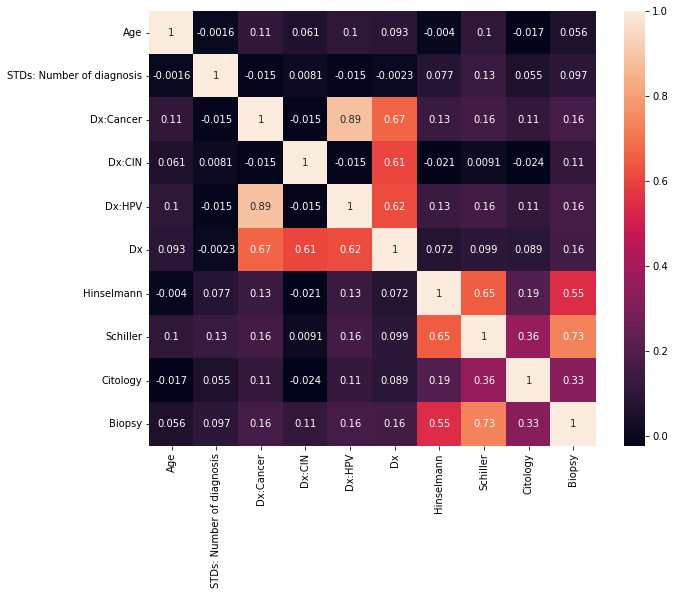

In [10]:
#gráfico de correlação entre as variáveis - utiliza o default o método de Pearson - Exemplo: https://www.inf.ufsc.br/~vera.carmo/Correlacao/Correlacao_Pearson_Spearman_Kendall.pdf
plt.figure(figsize = (10,8))
sns.heatmap(df_cancer.corr(),annot=True)

In [11]:
#contagem das diferentes classes presentes no dataset
print("Contagem da variável output")
df_cancer['Biopsy'].value_counts()

Contagem da variável output


0    803
1     55
Name: Biopsy, dtype: int64

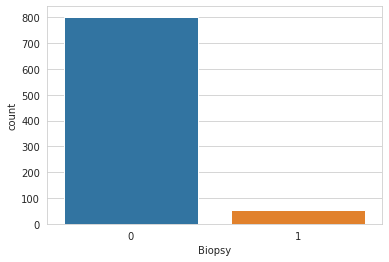

In [12]:
#exibe gráfico de coluna
sns.set_style('whitegrid')
sns.countplot(df_cancer['Biopsy'])

In [13]:
#Separa os dados em 2 conjuntos X (variáveis de entrada) e Y (variável preditora)
X = df_cancer.drop('Biopsy', axis = 1)
y = df_cancer['Biopsy']

In [14]:
#separa os dados em treinamento (70%) e teste (30% )
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [15]:
print(X_train)

     Age Number of sexual partners  ... Schiller Citology
59    35                       3.0  ...        0        0
641   39                       2.0  ...        0        0
42    36                       3.0  ...        0        0
463   14                       1.0  ...        0        0
235   25                       2.0  ...        0        0
..   ...                       ...  ...      ...      ...
350   20                       1.0  ...        0        0
79    35                       2.0  ...        0        0
835   24                       1.0  ...        0        0
792   23                       3.0  ...        0        0
520   17                       2.0  ...        0        0

[600 rows x 35 columns]


In [16]:
#transforma os dados na mesma escala - normaliza os dados
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [17]:
print(X_train)

[[ 0.90307605  0.334985    0.03284356 ... -0.21282896 -0.29153209
  -0.21707238]
 [ 1.34848963 -0.22487851  0.34563936 ... -0.21282896 -0.29153209
  -0.21707238]
 [ 1.01442944  0.334985    0.34563936 ... -0.21282896 -0.29153209
  -0.21707238]
 ...
 [-0.32181132 -0.78474201 -0.90554385 ... -0.21282896 -0.29153209
  -0.21707238]
 [-0.43316471  0.334985   -0.59274805 ... -0.21282896 -0.29153209
  -0.21707238]
 [-1.10128509 -0.22487851 -0.90554385 ... -0.21282896 -0.29153209
  -0.21707238]]


# **Etapa 2 - Classificadores**
Algoritmos de Classificação:

* K-vizinhos (encontre o melhor k)
* Árvore de decisão
* Naive Bayes
* SVM (encontre o melhor C)
* Random Forest (encontre o melhor número de estimadores)

In [22]:
#realiza o treinamento no modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=15)
knn_model.fit(X_train, y_train)

#realiza a predição
knn_pred = knn_model.predict(X_test)

Resultado do Modelo KNN
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       237
           1       0.71      0.24      0.36        21

    accuracy                           0.93       258
   macro avg       0.83      0.61      0.66       258
weighted avg       0.92      0.93      0.91       258

Resultado da matriz de Confusão do KNN


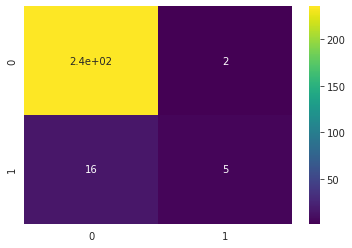

In [23]:
print("Resultado do Modelo KNN")
print(classification_report(y_test, knn_pred))
print("Resultado da matriz de Confusão do KNN")
confu_mat = confusion_matrix(y_test, knn_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(confu_mat, annot = True, cmap = 'viridis')

In [24]:
#realiza o treinamento no modelo Tree
tree_model = DecisionTreeClassifier() 
tree_model.fit(X_train, y_train)

#realiza a predição
tree_pred = tree_model.predict(X_test)


Resultado do Modelo Tree
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       237
           1       0.55      0.52      0.54        21

    accuracy                           0.93       258
   macro avg       0.75      0.74      0.75       258
weighted avg       0.92      0.93      0.93       258

Resultado da matriz de Tree


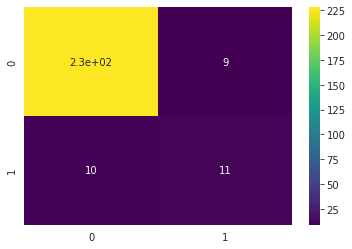

In [25]:
print("Resultado do Modelo Tree")
print(classification_report(y_test, tree_pred))
print("Resultado da matriz de Tree")
confu_mat = confusion_matrix(y_test, tree_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(confu_mat, annot = True, cmap = 'viridis')

In [26]:
#realiza o treinamento no modelo Gaussiano
gaus_model = GaussianNB()
gaus_model.fit(X_train, y_train)

#realiza a predição
gaus_pred = gaus_model.predict(X_test)


Resultado do Modelo Naive Bayes
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       237
           1       0.00      0.00      0.00        21

    accuracy                           0.92       258
   macro avg       0.46      0.50      0.48       258
weighted avg       0.84      0.92      0.88       258

Resultado da matriz de Naive Bayes


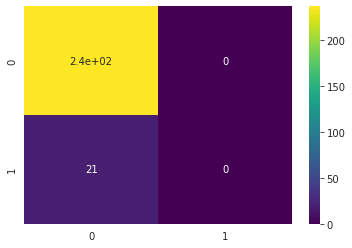

In [27]:
print("Resultado do Modelo Naive Bayes")
print(classification_report(y_test, gaus_pred))
print("Resultado da matriz de Naive Bayes")
confu_mat = confusion_matrix(y_test, gaus_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(confu_mat, annot = True, cmap = 'viridis')

In [28]:
#realiza o treinamento no modelo SVM
svm_model = SVC(C=1) 
svm_model.fit(X_train, y_train)

#realiza a predição
svm_pred = svm_model.predict(X_test)

Resultado do Modelo SVM
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       237
           1       0.67      0.10      0.17        21

    accuracy                           0.92       258
   macro avg       0.80      0.55      0.56       258
weighted avg       0.90      0.92      0.89       258

Resultado da matriz de SVM


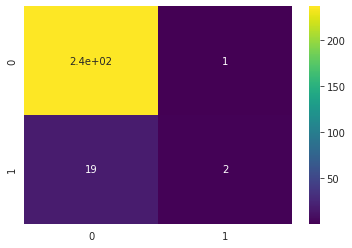

In [29]:
print("Resultado do Modelo SVM")
print(classification_report(y_test, svm_pred))
print("Resultado da matriz de SVM")
confu_mat = confusion_matrix(y_test, svm_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(confu_mat, annot = True, cmap = 'viridis')

In [30]:
#realiza o treinamento no modelo RandomForest
ran_fc = RandomForestClassifier(n_estimators=100)
ran_fc.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
#realiza a predição ou seja o teste
rfc_pred = ran_fc.predict(X_test)

In [32]:
print("Resultado do Modelo RandomForest")
print(classification_report(y_test, rfc_pred)) #realiza a comparação entre o real e o predito

Resultado do Modelo RandomForest
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       237
           1       0.75      0.29      0.41        21

    accuracy                           0.93       258
   macro avg       0.84      0.64      0.69       258
weighted avg       0.92      0.93      0.92       258



Resultado da matriz de Confusão do RandomForest


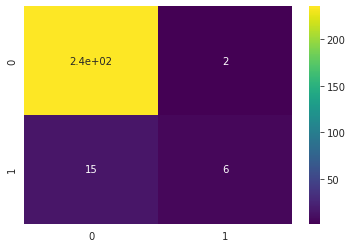

In [33]:
print("Resultado da matriz de Confusão do RandomForest")
confu_mat = confusion_matrix(y_test, rfc_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(confu_mat, annot = True, cmap = 'viridis')

In [34]:
#realiza o treinamento no modelo Rede Neural Multi Layer Perceptron
mlp_model = MLPClassifier(random_state=1, max_iter=400) 
mlp_model.fit(X_train, y_train)

#realiza a predição
mlp_pred = mlp_model.predict(X_test)

Resultado do Modelo Rede Neural Multi Layer Perceptron
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       237
           1       0.62      0.24      0.34        21

    accuracy                           0.93       258
   macro avg       0.78      0.61      0.65       258
weighted avg       0.91      0.93      0.91       258

Resultado da matriz Rede Neural Multi Layer Perceptron


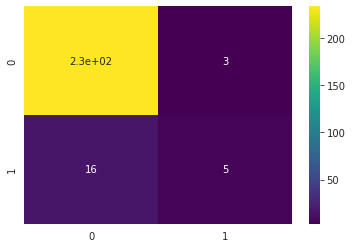

In [35]:
print("Resultado do Modelo Rede Neural Multi Layer Perceptron")
print(classification_report(y_test, mlp_pred))
print("Resultado da matriz Rede Neural Multi Layer Perceptron")
confu_mat = confusion_matrix(y_test, mlp_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(confu_mat, annot = True, cmap = 'viridis')